In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_curve,roc_auc_score,plot_roc_curve

In [2]:
data = pd.read_csv("Datasets/HR_comma_sep.csv")

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
le = preprocessing.LabelEncoder()
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [6]:
data['sales'] = le.fit_transform(data['sales'])
data['salary'] = le.fit_transform(data['salary'])

In [7]:
X = data.drop(['salary'],axis=1)
Y = data['salary']

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  int32  
dtypes: float64(2), int32(1), int64(6)
memory usage: 996.2 KB


In [9]:
Y.unique()

array([1, 2, 0])

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
model = MLPClassifier(hidden_layer_sizes=(50,60),
                      verbose=True,
                      random_state=5,
                      learning_rate_init=0.01
                      )

In [12]:
model.fit(X_train,y_train)

Iteration 1, loss = 3.65348111
Iteration 2, loss = 0.95204251
Iteration 3, loss = 0.94709234
Iteration 4, loss = 0.93399175
Iteration 5, loss = 0.94551631
Iteration 6, loss = 0.92439684
Iteration 7, loss = 0.97054482
Iteration 8, loss = 0.92643681
Iteration 9, loss = 0.91468475
Iteration 10, loss = 0.92502420
Iteration 11, loss = 0.92278681
Iteration 12, loss = 0.91323202
Iteration 13, loss = 0.91677495
Iteration 14, loss = 0.91494004
Iteration 15, loss = 0.91412116
Iteration 16, loss = 0.90995412
Iteration 17, loss = 0.91045509
Iteration 18, loss = 0.90344281
Iteration 19, loss = 0.90356649
Iteration 20, loss = 0.90130935
Iteration 21, loss = 0.90469089
Iteration 22, loss = 0.90259633
Iteration 23, loss = 0.90446761
Iteration 24, loss = 0.90077661
Iteration 25, loss = 0.89979576
Iteration 26, loss = 0.90079994
Iteration 27, loss = 0.90188199
Iteration 28, loss = 0.89873188
Iteration 29, loss = 0.89986443
Iteration 30, loss = 0.89855651
Iteration 31, loss = 0.89989310
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(50, 60), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [19]:
# help(ConfusionMatrixDisplay)

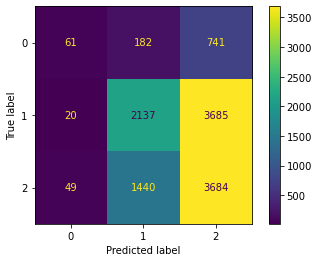

In [20]:
pred_train = model.predict(X_train)
cm = confusion_matrix(y_train, pred_train, labels=model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

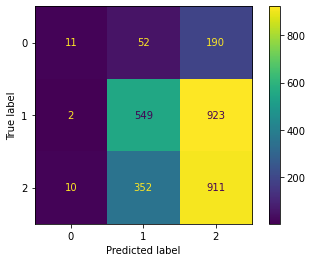

In [15]:
pred_test = model.predict(X_test)
cm = confusion_matrix(y_test, pred_test, labels=model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [16]:
y_proba = model.predict_proba(X_test)
rac = roc_auc_score(y_test,y_proba,average='macro',multi_class='ovr')
print(rac)

0.5787035414888958


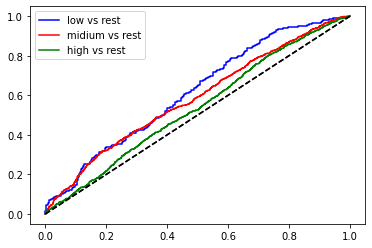

In [18]:
fpr = {}
tpr = {}
threshold = {}
classes = 3

for i in range(classes):
    fpr[i], tpr[i], threshold[i] = roc_curve(y_test,y_proba[:,i],pos_label=i)
plt.plot(fpr[0],tpr[0],linestyle ="-",c='b',label='low vs rest')
plt.plot(fpr[1],tpr[1],linestyle ="-",c='r',label='midium vs rest')
plt.plot(fpr[2],tpr[2],linestyle ="-",c='g',label='high vs rest')
plt.plot([[0,0],[1,1]],linestyle="--",c='black')
plt.legend()